In [2]:
import pandas as pd
import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = [10, 10]

In [3]:
#dataFr = pd.read_csv("./clean_data.csv")
#dataFr = pd.read_csv("./clean_data_without_nans.csv")
dataFr = pd.read_csv("./clean_data_without_nans_and_zeroes.csv")

In [4]:
dataFr

,Unnamed: 0,Year Property Built,Number of Bathrooms,Number of Rooms,Number of Stories,Number of Units,Property Area,Lot Area,Assessor Neighborhood,Assessed Value
0,138,1995.0,4.0,12.0,2.0,2.0,2420.0,2500.0,Hunters Point,335135
1,167,1942.0,0.0,1.0,1.0,0.0,0.0,396.0,Lower Pacific Heights,117011
2,175,2016.0,2.0,6.0,1.0,0.0,957.0,0.0,Hunters Point,780810
3,176,1909.0,1.0,7.0,1.0,1.0,1500.0,5500.0,Excelsior,596720
4,179,1929.0,3.0,8.0,3.0,0.0,3045.0,0.0,Russian Hill,1301167
...,...,...,...,...,...,...,...,...,...,...
2410840,2666112,1946.0,2.0,6.0,1.0,1.0,1535.0,2495.0,Merced Heights,321910
2410841,2666113,1937.0,3.0,9.0,1.0,1.0,1837.0,2500.0,Ingleside Heights,411518
2410842,2666114,1975.0,2.0,7.0,1.0,1.0,1904.0,0.0,Lake Shore,945064
2410843,2666115,1939.0,1.0,7.0,1.0,1.0,1897.0,4360.0,Lakeside,1297121


<AxesSubplot:>

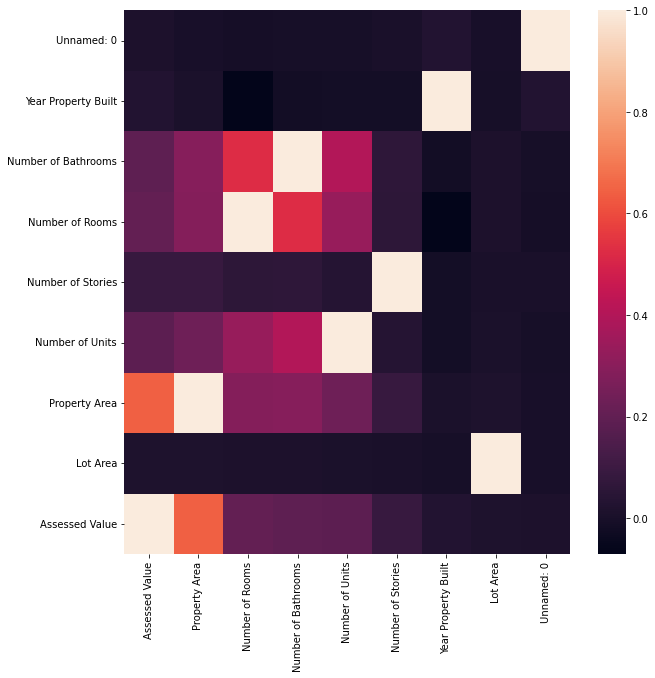

In [5]:
corDataFr = dataFr.corr()
corDataFrSortId = corDataFr.sort_values('Assessed Value', ascending=False).index
corDataFrSorted = corDataFr.loc[:, corDataFrSortId]
sns.heatmap(corDataFrSorted)

In [6]:
import matplotlib
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [10, 10]

PropertyArea = 0
NumberOfRooms = 1
NumberOfBath = 2
NumberOfUnit = 3
NumberOfStories = 4

Weights = [1,1,1,1,1]

picked_column_names = ["Property Area", "Number of Rooms", "Number of Bathrooms",
                        "Number of Units", "Number of Stories"]

def func(x, a0, a1, a2, a3, a4, a):
    return Weights[PropertyArea]*x[PropertyArea]*a0 + Weights[NumberOfRooms]*x[NumberOfRooms]*a1 
    + Weights[NumberOfBath]*x[NumberOfBath]*a2 + Weights[NumberOfUnit]*x[NumberOfUnit]*a3 + Weights[NumberOfStories]*x[NumberOfStories]*a4 + a

class CustomModelWrapper:
    def __init__(self, pred_fun, params):
        self.pred_fun = pred_fun
        self.params = params
    
    def predict(self, x):
        return self.pred_fun(x.ravel(), *self.params)


Train data in: all
[[ 2.27125568 -0.46724713 -0.47369067 -0.47626808 -0.47626808]
 [ 2.33440233 -0.46853584 -0.47369067 -0.47626808 -0.47497937]
 [ 1.37302676 -0.47111325 -0.47626808 -0.47626808 -0.47626808]
 ...
 [ 2.1501172  -0.46853584 -0.47369067 -0.47626808 -0.47497937]
 [ 1.72999865 -0.47111325 -0.47497937 -0.47626808 -0.47626808]
 [ 2.06763994 -0.46853584 -0.47369067 -0.47626808 -0.47626808]]
[763597 235526 449770 ... 105780 450682 229764]
[ 7.71097224e+04 -7.65199929e+05  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00]


C:\Users\Gordon Freeman\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


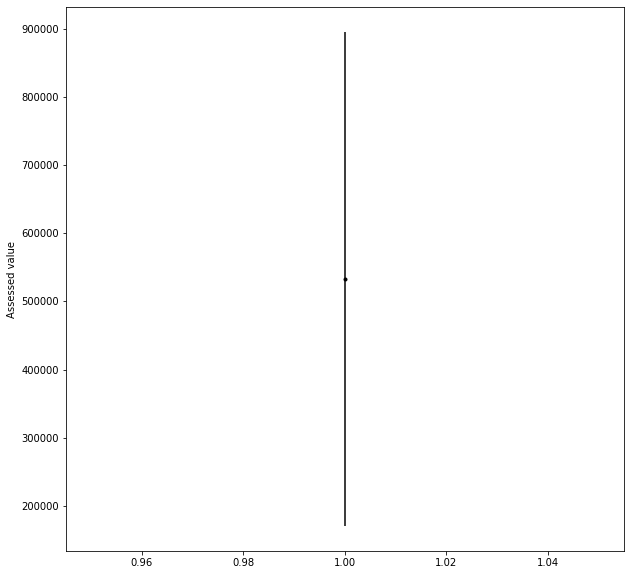

In [14]:
dataFr = pd.read_csv("./clean_data_without_nans.csv")

dataFr = dataFr[dataFr['Assessor Neighborhood'] == 'Pine Lake Park']
    
    
print('Train data in: all')
X = dataFr[picked_column_names].values
Y = dataFr['Assessed Value'].values

X =(X-X.mean())/X.std()
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)    

print(X_train)
print(Y_train)

params, _ = curve_fit(func, xdata=X_train.ravel(), ydata=Y_train) 
print(params)   
    
model_custom = CustomModelWrapper(func, params)
Y_pred = list(map(model_custom.predict, X_test))

svr_mse = mean_squared_error(Y_test, Y_pred, squared=False)

plt.ylabel("Assessed value")
plt.errorbar(1, np.average(Y), yerr=svr_mse, fmt='.k');

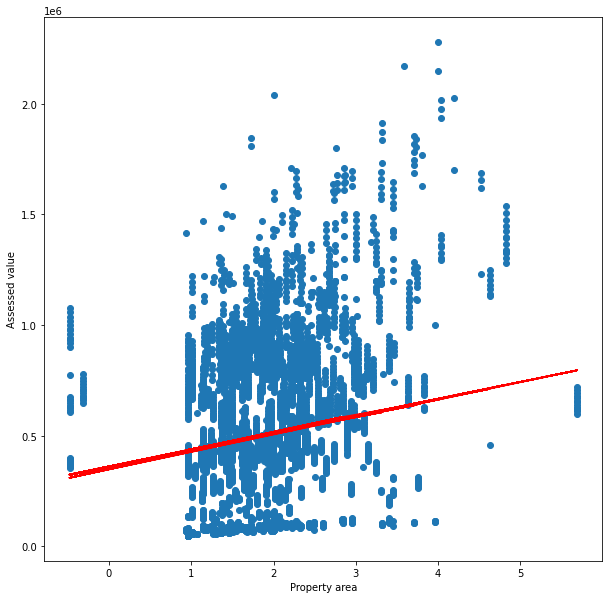

In [15]:
plt.xlabel("Property area")
plt.ylabel("Assessed value")
plt.scatter([i[0] for i in X], Y);
plt.plot([i[0] for i in X], [func(x.ravel(), *params) for x in X], '-r', label='model')

In [9]:
print(X[0:5])
print([func(x.ravel(), *params) for x in X[0:5]])

[[ 0.19115372 -0.06595094 -0.06680511 -0.06701865 -0.06701865]
 [-0.06723219 -0.06712542 -0.06723219 -0.06723219 -0.06712542]
 [ 0.03494769 -0.06659156 -0.06701865 -0.06723219 -0.06712542]
 [ 0.09292436 -0.06648479 -0.06712542 -0.06712542 -0.06712542]
 [ 0.25788561 -0.06637802 -0.06691188 -0.06723219 -0.06691188]]
[5236975.523403703, -1400122.344670581, 1224208.6939023077, 2714208.6125451033, 6954674.908747837]
